# Курсовая работа по СиАОД
## Выполнил студент группы БСТ2203 Иванов Данила Дмитриевич

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:

| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |

Необходимо:

1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями.

In [1]:
import csv # Для работы с файлом
import pandas as pd # Для вывода в виде таблицы
import matplotlib.pyplot as plt # Для графического вывода
class HashTable: # Класс таблицы
    def __init__(self): # Инициализация
        self.table = {}
    def insert(self, key, value): # Вставка
        self.table[key] = value
def SelectionSortSpec(revenues, quantity, names): # Специальная сортировка выбором для соответствия индексов
    for i in range(len(revenues)): # Проход строки
        min = i # Индекс i принимается за индекс минимального элемента
        for j in range(i + 1, len(revenues)): # Проход элементов строки
            if revenues[j] < revenues[min]:
                min = j
        revenues[i], revenues[min] = revenues[min], revenues[i] # Минимальный элемент сдвигается влево (Выручка)
        quantity[i], quantity[min] = quantity[min], quantity[i] # Минимальный элемент сдвигается влево (Количесвто)
        names[i], names[min] = names[min], names[i] # Минимальный элемент сдвигается влево (Номенклатура)
def SearchQuan(sales, quantity): # Поиск названий товаров для числа продаж
    for key, value in sales.table.items():
        if value["Количество продаж"] == quantity: # Если значение таблицы равно искомому числу
            return value["Название товара"]
def SearchRev(sales, revenue): # Поиск названий товаров для выручки
    for key, value in sales.table.items():
        if value["Общая стоимость"] == revenue: # Если значение таблицы равно искомому числу
            return value["Название товара"]
def Rehash(key, keys): # Простое рехеширование
    key += 1
    return key
def FormatPrint(sales, quantity, revenues): # Форматированный вывод
    total_revenue = sum(revenues) # Общая выручка
    max_sold_num = max(quantity) # Наиболее продаваемый товар
    max_sold = SearchQuan(sales, max_sold_num) # Название наиболее продаваемого товара
    max_revenue_num = max(revenues) # Наиболее прибыльный товар
    max_revenue = SearchRev(sales, max_revenue_num) # Название наиболее прибыльного товара
    min_sold_num = min(quantity) # Наименее продаваемый товар
    min_sold = SearchQuan(sales, min_sold_num) # Название наименее продаваемого товара
    min_revenue_num = min(revenues) # Наименее прибыльный товар
    min_revenue = SearchRev(sales, min_revenue_num) # Название наименее прибыльного товара
    print("-----------------------------------------------------------------------------------------------------------")
    for key, value in sales.table.items(): # Построчный вывод таблицы
        revenue = value["Общая стоимость"] # Выручка товара
        share = round((value["Общая стоимость"] / total_revenue) * 100, 1) # Доля от общей выручки
        print(f'Товар {value["Название товара"]} был продан {value["Количество продаж"]} раз(-а), выручка - {revenue:.0f} руб., доля от общей выручки - {share}%')
    print("-----------------------------------------------------------------------------------------------------------")
    print(f"Общая выручка составляет {total_revenue:.0f} руб.")
    print("-----------------------------------------------------------------------------------------------------------")
    print(f"Наиболее продаваемый товар {max_sold}, продан {max(quantity)} раз(-а)")
    print(f"Наиболее доходный товар {max_revenue}, выручка - {max(revenues):.0f} руб.")
    print("-----------------------------------------------------------------------------------------------------------")
    print(f"Наименее продаваемый товар {min_sold}, продан {min(quantity)} раз(-а)")
    print(f"Наименее доходный товар {min_revenue}, выручка - {min(revenues):.0f} руб.")
    print("-----------------------------------------------------------------------------------------------------------")

In [2]:
Sales = HashTable() # Таблица по продажам
Quantity = [] # Массив количеств продаж
Revenues = [] # Массив выручек товаров
Names = [] # Массив названий товаров
Keys = [] # Массив ключей
try: # Для предотвращения неверного ввода
    with open("Table.csv", mode="r", encoding="utf-8") as file:
        reader = csv.DictReader(file, delimiter=";")
        for row in reader: # Построчное чтение файла
            Quantity.append(int(row["Количество продаж"]))
            Revenues.append(int(row["Общая стоимость"]))
            Names.append(row["Название товара"])
            key = int(row["Номер заказа"].strip()) # Ключ
            while key in Keys: # Коллизия
                key = Rehash(key, Keys)
            Keys.append(key)
            data = { # Значение
                "Дата заказа": row["Дата заказа"].strip(),
                "Название товара": row["Название товара"].strip(),
                "Категория товара": row["Категория товара"].strip(),
                "Количество продаж": int(row["Количество продаж"].strip()),
                "Цена за единицу": int(row["Цена за единицу"].strip()),
                "Общая стоимость": int(row["Общая стоимость"].strip())
            }
            Sales.insert(key, data) # Вставка в таблицу
    FormatPrint(Sales, Quantity, Revenues) # Вывод
    error = False
except: # Исключение
    error = True
    print("Ошибка ввода из файла!")

-----------------------------------------------------------------------------------------------------------
Товар Яблоки (1 кг.) был продан 148 раз(-а), выручка - 17760 руб., доля от общей выручки - 5.1%
Товар Огурцы (1 кг.) был продан 143 раз(-а), выручка - 15015 руб., доля от общей выручки - 4.3%
Товар Апельсины (1 кг.) был продан 89 раз(-а), выручка - 11570 руб., доля от общей выручки - 3.3%
Товар Картофель (1 кг.) был продан 115 раз(-а), выручка - 6900 руб., доля от общей выручки - 2.0%
Товар Вода питьевая (1 л.) был продан 132 раз(-а), выручка - 19800 руб., доля от общей выручки - 5.7%
Товар Хлеб пшеничный был продан 252 раз(-а), выручка - 31500 руб., доля от общей выручки - 9.1%
Товар Хлеб ржаной был продан 189 раз(-а), выручка - 26460 руб., доля от общей выручки - 7.6%
Товар Молоко (1 л.) был продан 143 раз(-а), выручка - 22880 руб., доля от общей выручки - 6.6%
Товар Кофе эспрессо был продан 65 раз(-а), выручка - 45500 руб., доля от общей выручки - 13.1%
Товар Кофе латте был пр

In [3]:
if not error:
    SelectionSortSpec(Revenues, Quantity, Names) # Специальная сортировка
    total_revenue = sum(Revenues) # Обшая выручка
    Shares = [] # Массив долей от общей выручки
    for i in range (len(Revenues)): # Расчет долей
        share = round((Revenues[i] / total_revenue) * 100, 1) # Доля от общей выручки
        Shares.append(share)
    data = {"Название товара": Names, "Количество продаж": Quantity, "Выручка, руб.": Revenues, "Доля от общей выручки, %": Shares}
    df = pd.DataFrame(data) # Вывод в виде таблицы
    display(df)
else:
    print("Некорректный ввод из файла!")

,Название товара,Количество продаж,"Выручка, руб.","Доля от общей выручки, %"
0,Свекла (1 кг.),76,5320,1.5
1,Картофель (1 кг.),115,6900,2.0
2,Апельсины (1 кг.),89,11570,3.3
3,Огурцы (1 кг.),143,15015,4.3
4,Капуста (1 кг.),85,17000,4.9
5,Мука пшеничная (1 кг.),193,17370,5.0
6,Яблоки (1 кг.),148,17760,5.1
7,Вода питьевая (1 л.),132,19800,5.7
8,Бананы (1 кг.),137,20550,5.9
9,Молоко (1 л.),143,22880,6.6


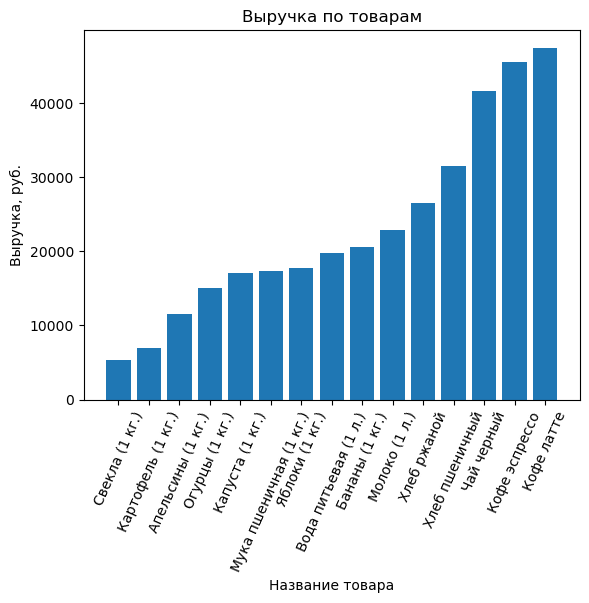

In [4]:
if not error:
    plt.bar(Names, Revenues) # Создание гистограммы по выручкам
    plt.xlabel("Название товара") # Ось x
    plt.ylabel("Выручка, руб.") # Ось y
    plt.title("Выручка по товарам") # Заголовок
    plt.xticks(rotation=66) # Поворот названий
    plt.show() # Вывод гистограммы
else:
    print("Некорректный ввод из файла!")

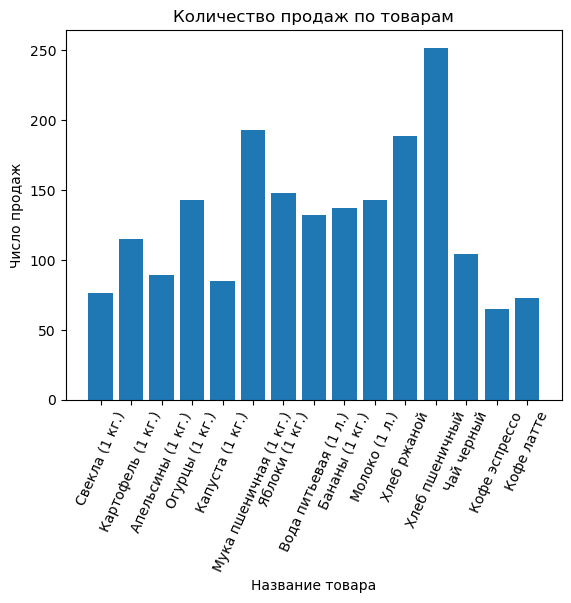

In [5]:
if not error:
    plt.bar(Names, Quantity) # Создание гистограммы по числу продаж
    plt.xlabel("Название товара") # Ось x
    plt.ylabel("Число продаж") # Ось y
    plt.title("Количество продаж по товарам") # Заголовок
    plt.xticks(rotation=66) # Поворот названий
    plt.show() # Вывод гистограммы
else:
    print("Некорректный ввод из файла!")

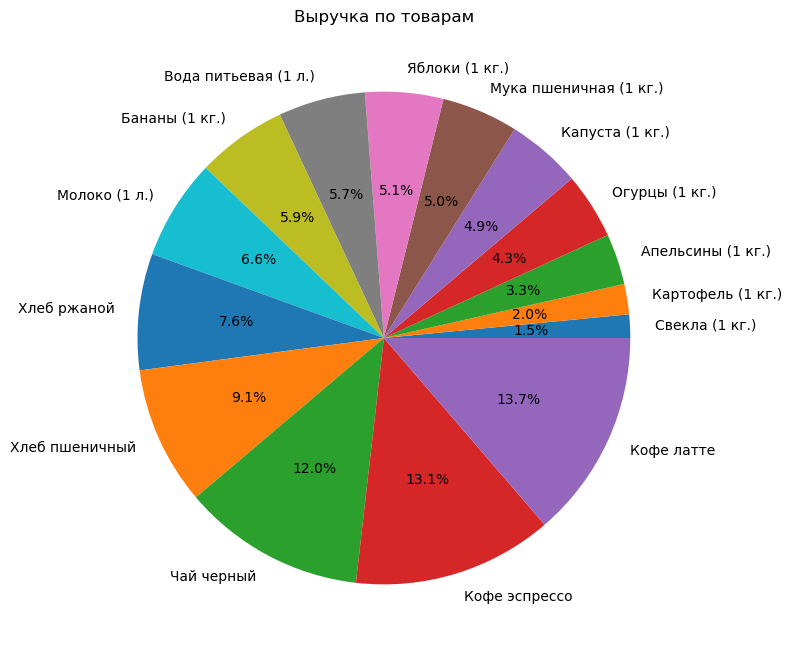

In [6]:
if not error:
    plt.figure(figsize=(8, 8)) # Размер диаграммы
    plt.pie(Revenues, labels=Names, autopct='%1.1f%%') # Создание круговой диаграммы по выручке с процентами
    plt.title("Выручка по товарам") # Заголовок
    plt.show() # Вывод диаграммы
else:
    print("Некорректный ввод из файла!")

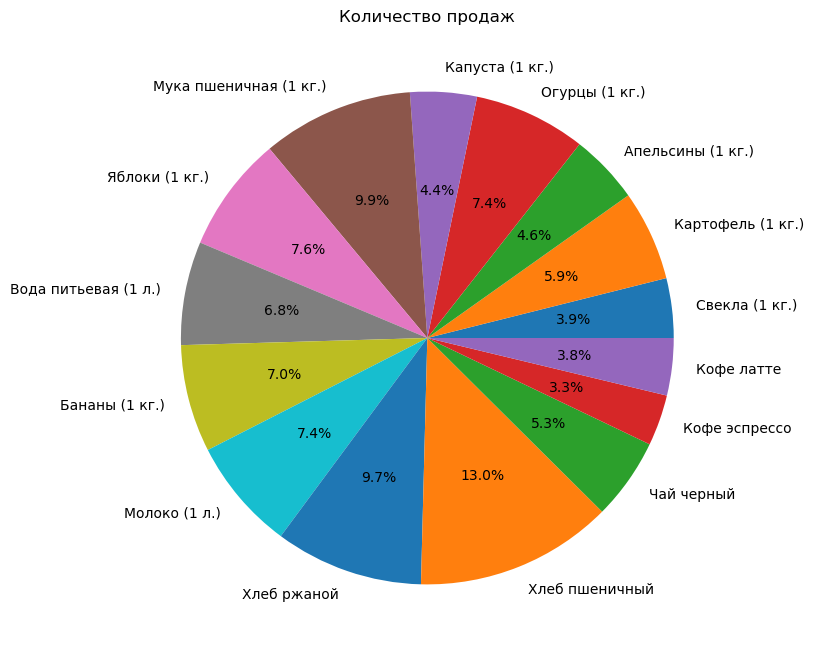

In [7]:
if not error:
    plt.figure(figsize=(8, 8)) # Размер диаграммы
    plt.pie(Quantity, labels=Names, autopct='%1.1f%%') # Создание круговой диаграммы по числу продаж с процентами
    plt.title("Количество продаж") # Заголовок
    plt.show() # Вывод диаграммы
else:
    print("Некорректный ввод из файла!")

### Вывод


В ходе выполнения курсовой работы была создана программа обработки csv-файла. Программа получает на вход файл с товарами, их ценами, продажами и т.д. После этого рассчитывается общая выручка, определяются самый продаваемый и самый прибыльный товары, наименее продаваемый и наименее прибильный товары. Далее создаются гистограммы и круговые диаграммы для графического отображения выручек и числа продаж товаров.